## MULTIPLE LINEAR REGRESSION MODEL FOR BUILDING THE PREDICTION MODEL OF: Managed Aquifer Recharge Precipitation

# Objective:
* To identify which factor has more impact on Managed Aquifer Recharge(MAR)- (PPT) Parts Per Thousand(7100cm) i.e. (MAR_PPT7100_CM).
* To build the Model which will help to Predict the future MAR PPT 7100cm based on water precipitation, drain area and relative humidity (RH).

In [2]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Import

In [80]:
new = pd.read_excel(r"C:\Users\dell\Desktop\Machine Learning\reg_data.xlsx")
new

,SITE No.,max90,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,MAR_PPT7100_CM,RRMEDIAN
0,1013500,12440.0,2252.6960,97.4178,3.004670,3.0,71.67319,6.317267,0.214765
1,1022500,6343.0,573.6006,120.0702,5.945692,6.3,68.82603,10.675010,0.162037
2,1030500,23680.0,3676.1720,108.1906,4.815170,5.4,69.60340,8.694030,0.138599
3,1031500,12200.0,769.0482,118.0008,4.143458,4.9,68.47412,9.538659,0.284875
4,1047000,14730.0,909.0972,118.8615,3.990672,5.6,68.73347,9.503299,0.201850
...,...,...,...,...,...,...,...,...,...
288,14305500,23730.0,526.3299,283.6101,9.598534,10.8,74.50171,31.650220,0.312321
289,14306500,23160.0,857.1636,210.8768,11.580460,11.9,73.79094,23.884840,0.221679
290,14309500,6867.0,224.9208,135.5243,10.815260,11.1,71.13673,16.212110,0.413828
291,14316700,15530.0,587.8989,151.9316,10.132230,10.8,70.79336,17.482390,0.388019


# Data Type 

In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SITE No.        293 non-null    int64  
 1   max90           293 non-null    float64
 2   DRAIN_SQKM      293 non-null    float64
 3   PPTAVG_BASIN    293 non-null    float64
 4   T_AVG_BASIN     293 non-null    float64
 5   T_AVG_SITE      293 non-null    float64
 6   RH_BASIN        293 non-null    float64
 7   MAR_PPT7100_CM  293 non-null    float64
 8   RRMEDIAN        293 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 20.7 KB


# Univariate Analysis

In [6]:
new.describe()

,SITE No.,max90,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,MAR_PPT7100_CM,RRMEDIAN
count,2.930000e+02,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,5.940630e+06,9272.692969,1102.690735,120.167864,9.414611,10.336177,66.688023,11.407790,0.414662
std,4.230214e+06,10614.178934,2201.065658,54.461900,4.530652,4.288227,6.589742,6.816851,0.136023
min,1.013500e+06,16.030000,5.376711,37.775550,-1.580190,-0.400000,41.109790,1.738929,0.080420
25%,2.065500e+06,2231.000000,208.685700,88.460860,5.908310,7.300000,65.736980,7.303559,0.316517
50%,5.362000e+06,5646.000000,450.198900,114.684900,9.044242,10.000000,67.787320,9.876296,0.413793
75%,9.223000e+06,13670.000000,1151.567000,131.405500,12.188860,12.900000,70.239780,12.260880,0.513699
max,1.432500e+07,81900.000000,25791.040000,334.167800,22.500220,22.500000,84.201140,37.370240,0.710843


## Missing Value

In [9]:
new.isna().sum()

SITE No.          0
max90             0
DRAIN_SQKM        0
PPTAVG_BASIN      0
T_AVG_BASIN       0
T_AVG_SITE        0
RH_BASIN          0
MAR_PPT7100_CM    0
RRMEDIAN          0
dtype: int64

# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

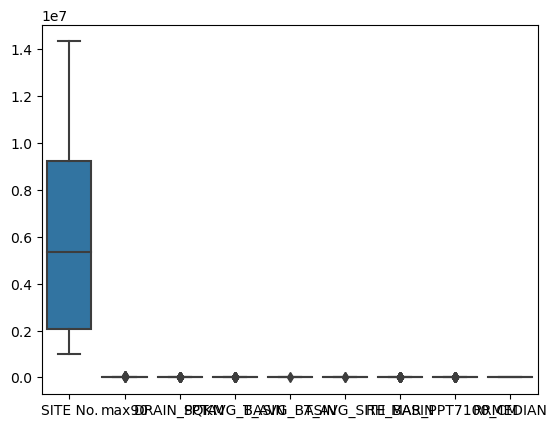

In [81]:
sns.boxplot(data = new)

## Treatment of Outlier -- Winsorizing Technique

In [27]:
q1 = new['SITE No.'].quantile(0.25)
q3 = new['SITE No.'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr
lower_limit = q3-1.5*iqr

new['SITE No.']=np.where(new['SITE No.'] > upper_limit,upper_limit,new['SITE No.'])
new['SITE No.']=np.where(new['SITE No.'] < lower_limit,lower_limit,new['SITE No.'])

In [19]:
q1 = new['max90'].quantile(0.25)
q3 = new['max90'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr
lower_limit = q3-1.5*iqr

new['max90']=np.where(new['max90'] > upper_limit,upper_limit,new['max90'])
new['max90']=np.where(new['max90'] < lower_limit,lower_limit,new['max90'])

In [20]:
q1 = new['DRAIN_SQKM'].quantile(0.25)
q3 = new['DRAIN_SQKM'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr
lower_limit = q3-1.5*iqr

new['DRAIN_SQKM']=np.where(new['DRAIN_SQKM'] > upper_limit,upper_limit,new['DRAIN_SQKM'])
new['DRAIN_SQKM']=np.where(new['DRAIN_SQKM'] < lower_limit,lower_limit,new['DRAIN_SQKM'])

In [21]:
q1 = new['PPTAVG_BASIN'].quantile(0.25)
q3 = new['PPTAVG_BASIN'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr
lower_limit = q3-1.5*iqr

new['PPTAVG_BASIN']=np.where(new['PPTAVG_BASIN'] > upper_limit,upper_limit,new['PPTAVG_BASIN'])
new['PPTAVG_BASIN']=np.where(new['PPTAVG_BASIN'] < lower_limit,lower_limit,new['PPTAVG_BASIN'])

In [22]:
q1 = new['T_AVG_BASIN'].quantile(0.25)
q3 = new['T_AVG_BASIN'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr
lower_limit = q3-1.5*iqr

new['T_AVG_BASIN']=np.where(new['T_AVG_BASIN'] > upper_limit,upper_limit,new['T_AVG_BASIN'])
new['T_AVG_BASIN']=np.where(new['T_AVG_BASIN'] < lower_limit,lower_limit,new['T_AVG_BASIN'])

In [23]:
q1 = new['T_AVG_SITE'].quantile(0.25)
q3 = new['T_AVG_SITE'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr
lower_limit = q3-1.5*iqr

new['T_AVG_SITE']=np.where(new['T_AVG_SITE'] > upper_limit,upper_limit,new['T_AVG_SITE'])
new['T_AVG_SITE']=np.where(new['T_AVG_SITE'] < lower_limit,lower_limit,new['T_AVG_SITE'])

In [24]:
q1 = new['RH_BASIN'].quantile(0.25)
q3 = new['RH_BASIN'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr
lower_limit = q3-1.5*iqr

new['RH_BASIN']=np.where(new['RH_BASIN'] > upper_limit,upper_limit,new['RH_BASIN'])
new['RH_BASIN']=np.where(new['RH_BASIN'] < lower_limit,lower_limit,new['RH_BASIN'])

In [25]:
q1 = new['MAR_PPT7100_CM'].quantile(0.25)
q3 = new['MAR_PPT7100_CM'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr
lower_limit = q3-1.5*iqr

new['MAR_PPT7100_CM']=np.where(new['MAR_PPT7100_CM'] > upper_limit,upper_limit,new['MAR_PPT7100_CM'])
new['MAR_PPT7100_CM']=np.where(new['MAR_PPT7100_CM'] < lower_limit,lower_limit,new['MAR_PPT7100_CM'])

In [26]:
q1 = new['RRMEDIAN'].quantile(0.25)
q3 = new['RRMEDIAN'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr
lower_limit = q3-1.5*iqr

new['RRMEDIAN']=np.where(new['RRMEDIAN'] > upper_limit,upper_limit,new['RRMEDIAN'])
new['RRMEDIAN']=np.where(new['RRMEDIAN'] < lower_limit,lower_limit,new['RRMEDIAN'])

<AxesSubplot:>

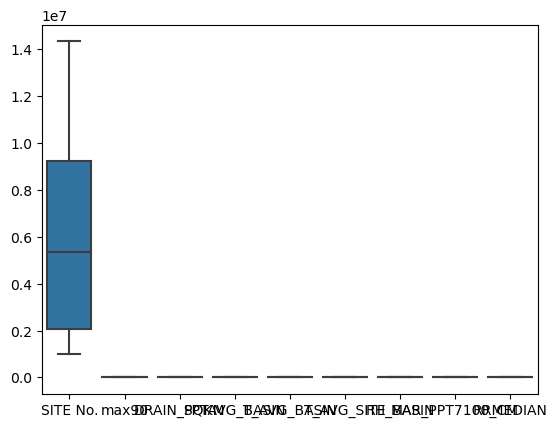

In [28]:
sns.boxplot(data = new)

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [33]:
# Putting feature variable to X
X = new.drop('MAR_PPT7100_CM', axis= 1)

# Putting response variable to y
y = new[['MAR_PPT7100_CM']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=111)

In [32]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,RRMEDIAN,SITE No.,max90,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,MAR_PPT7100_CM
96,0.474576,2472500.0,13510.0,789.9363,154.27490,18.157630,18.3,72.66047,16.444390
200,0.343137,7167500.0,11820.0,319.6179,94.35417,13.814480,13.6,63.52230,7.297830
221,0.546771,10234500.0,623.6,236.4192,75.93198,3.865026,7.6,63.48558,9.642220
287,0.449183,14301500.0,21930.0,417.5676,195.82246,9.159267,10.3,76.99398,19.696862
75,0.473934,2074500.0,6369.0,288.5310,117.29740,13.495710,14.0,66.18230,11.120910


In [30]:
df.corr()

,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,MAR_PPT7100_CM,RRMEDIAN
DRAIN_SQKM,1.000000,-0.247042,-0.030206,-0.047696,-0.085664,-0.253550,-0.021468
PPTAVG_BASIN,-0.247042,1.000000,0.077520,0.108814,0.557289,0.926880,-0.110353
T_AVG_BASIN,-0.030206,0.077520,1.000000,0.968185,0.190749,0.082471,-0.010893
T_AVG_SITE,-0.047696,0.108814,0.968185,1.000000,0.092357,0.147544,0.023743
RH_BASIN,-0.085664,0.557289,0.190749,0.092357,1.000000,0.355544,-0.168046
MAR_PPT7100_CM,-0.253550,0.926880,0.082471,0.147544,0.355544,1.000000,-0.108488
RRMEDIAN,-0.021468,-0.110353,-0.010893,0.023743,-0.168046,-0.108488,1.000000


<AxesSubplot:>

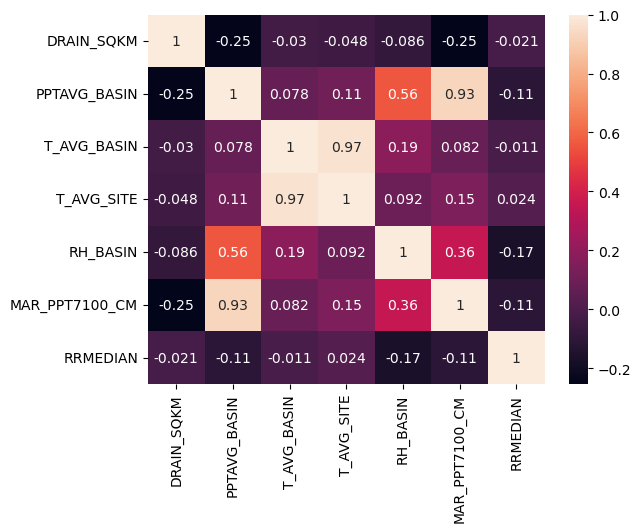

In [31]:
sns.heatmap(df.corr(),annot = True)

# Correlation Matrix

<AxesSubplot:title={'center':'MAR_PPT7100_CM vs PPTAVG_BASIN'}, xlabel='PPTAVG_BASIN', ylabel='MAR_PPT7100_CM'>

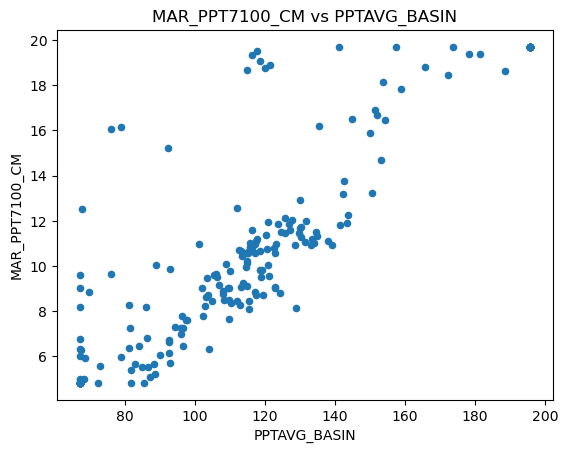

In [34]:
df.plot.scatter(x='PPTAVG_BASIN', y='MAR_PPT7100_CM', title='MAR_PPT7100_CM vs PPTAVG_BASIN')

## Multicolinearity (with the help of VIF)

In [41]:
X1 = df.drop(['MAR_PPT7100_CM', 'T_AVG_BASIN', 'RH_BASIN', 'SITE No.', 'max90'],axis=1)

VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

RRMEDIAN        6.793062
DRAIN_SQKM      1.989110
PPTAVG_BASIN    6.986957
T_AVG_SITE      7.056073
dtype: float64

# Model Building

* Ho: There is no relationship between MAR PPT 7100cm and water precipitation, drain area and relative humidity (RH).
                                                vs
* Ho: There is no relationship between MAR PPT 7100cm and water precipitation, drain area and relative humidity (RH).
    
* Alpha = 0.05 (5%)

In [45]:
import statsmodels.formula.api as smf
model = smf.ols('MAR_PPT7100_CM ~ PPTAVG_BASIN + DRAIN_SQKM + RRMEDIAN + T_AVG_SITE',data=df).fit()
model.summary()                                     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MAR_PPT7100_CM   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.4
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.88e-61
Time:                        20:49:12   Log-Likelihood:                -461.14
No. Observations:                 205   AIC:                             932.3
Df Residuals:                     200   BIC:                             948.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.6596      0.931     -1.783      0.076      -3.495       0.176
PPTAVG_BASIN     0.1081      0.005     23.082      0.000       0.099       0.117
DRAIN_SQKM      -0.0006      0.000     -2.665      0.008      -0.001      -0.000
RRMEDIAN        -0.5384      1.276     -0.422      0.674      -3.055       1.978
T_AVG_SITE       0.0605      0.039      1.550      0.123      -0.016       0.138
==============================================================================
Omnibus:                       90.610   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.186
Skew:                           1.901   Prob(JB):                     3.21e-62
Kurtosis:                       7.325   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Method 1

In [49]:
# removing the insignificant variable 
model2=smf.ols('MAR_PPT7100_CM ~ PPTAVG_BASIN + T_AVG_SITE',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MAR_PPT7100_CM   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     311.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.01e-62
Time:                        20:51:30   Log-Likelihood:                -464.74
No. Observations:                 205   AIC:                             935.5
Df Residuals:                     202   BIC:                             945.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.6000      0.652     -3.987      0.000      -3.886      -1.314
PPTAVG_BASIN     0.1113      0.005     24.546      0.000       0.102       0.120
T_AVG_SITE       0.0484      0.039      1.235      0.218      -0.029       0.126
==============================================================================
Omnibus:                      102.698   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.413
Skew:                           2.111   Prob(JB):                     3.02e-82
Kurtosis:                       8.111   Cond. No.                         486.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  * There is a linear relationship between Managed Aquifer Recharge Precipitation (MAR_PPT7100_CM) and Average precipitation in basin of river.

##### * 76.3% of model accuracy, so we say model is a good fit.

##### * Y = -2.6000 + 0.1113* PPTAVG_BASIN + 0.0484* T_AVG_BASIN

# Method 2

In [50]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
Model3= lreg.fit(X_train,y_train)

In [51]:
np.round(Model3.intercept_,4)

array([8.3036])

In [52]:
np.round(Model3.coef_,4)

array([[ 0.0000e+00, -0.0000e+00, -6.0000e-04,  1.0830e-01, -1.7720e-01,
         3.0440e-01, -1.7010e-01, -2.5123e+00]])

In [53]:
np.round(Model3.score(X_train,y_train),3)

0.843

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [54]:
df.head()

,RRMEDIAN,SITE No.,max90,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,MAR_PPT7100_CM
96,0.474576,2472500.0,13510.0,789.9363,154.27490,18.157630,18.3,72.66047,16.444390
200,0.343137,7167500.0,11820.0,319.6179,94.35417,13.814480,13.6,63.52230,7.297830
221,0.546771,10234500.0,623.6,236.4192,75.93198,3.865026,7.6,63.48558,9.642220
287,0.449183,14301500.0,21930.0,417.5676,195.82246,9.159267,10.3,76.99398,19.696862
75,0.473934,2074500.0,6369.0,288.5310,117.29740,13.495710,14.0,66.18230,11.120910


In [56]:
Y = -2.6000 + 0.1113*154.27490 + 0.0484*18.3
Y

15.45651637

In [57]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,RRMEDIAN,SITE No.,max90,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,MAR_PPT7100_CM,fitted_value,residual
96,0.474576,2472500.0,13510.0,789.9363,154.27490,18.157630,18.3,72.66047,16.444390,15.462369,0.982021
200,0.343137,7167500.0,11820.0,319.6179,94.35417,13.814480,13.6,63.52230,7.297830,8.563529,-1.265699
221,0.546771,10234500.0,623.6,236.4192,75.93198,3.865026,7.6,63.48558,9.642220,6.221927,3.420293
287,0.449183,14301500.0,21930.0,417.5676,195.82246,9.159267,10.3,76.99398,19.696862,19.700577,-0.003715
75,0.473934,2074500.0,6369.0,288.5310,117.29740,13.495710,14.0,66.18230,11.120910,11.137263,-0.016353


# 1.Linearity

<AxesSubplot:title={'center':'MAR_PPT7100_CM vs PPTAVG_BASIN'}, xlabel='PPTAVG_BASIN', ylabel='MAR_PPT7100_CM'>

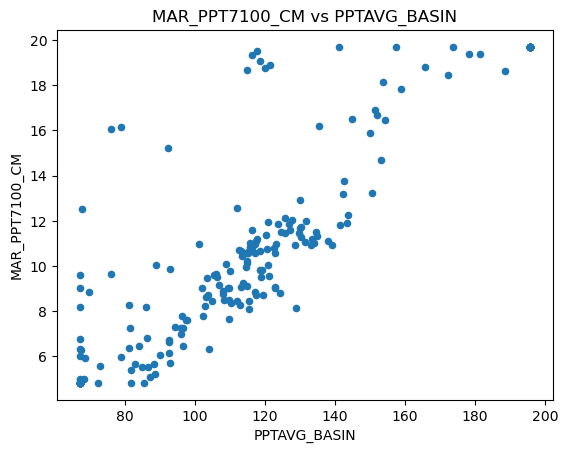

In [58]:
df.plot.scatter(x='PPTAVG_BASIN', y='MAR_PPT7100_CM', title='MAR_PPT7100_CM vs PPTAVG_BASIN')

# 2. Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

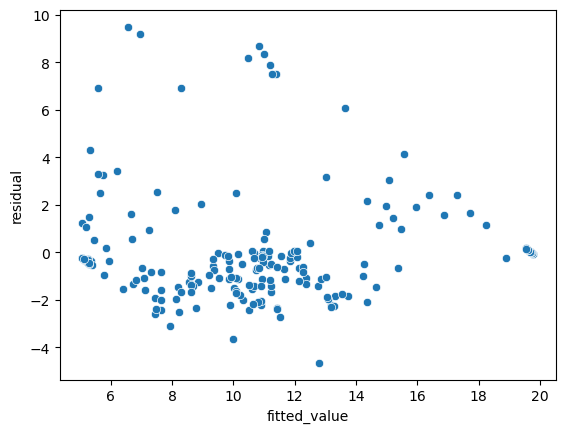

In [59]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# 3.Normality

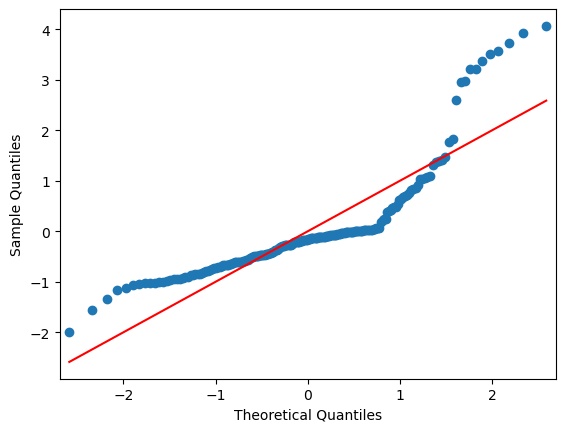

In [60]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# 4.Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

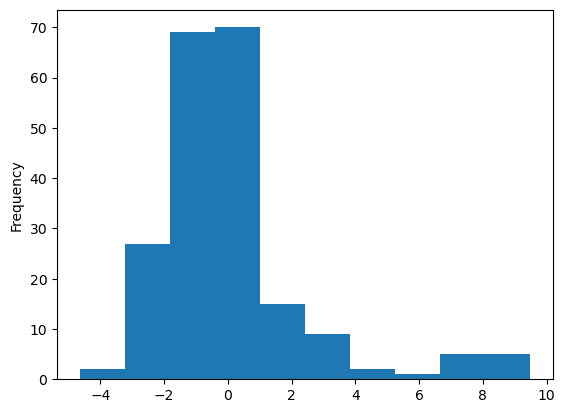

In [61]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [62]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,SITE No.,max90,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,RRMEDIAN,MAR_PPT7100_CM
130,4045500.0,5741.0,1909.5920,82.79437,4.799826,4.5,74.41373,0.250000,5.653332
214,8267500.0,288.4,96.2577,72.44487,2.883262,5.2,63.48558,0.514750,7.781786
127,3574500.0,24350.0,813.8025,151.29270,14.415350,15.2,71.37607,0.545012,16.916710
126,3504000.0,2551.0,134.5167,195.82246,10.832940,10.9,70.27663,0.371034,19.696862
39,1544500.0,5562.0,355.0644,106.34490,7.229384,8.1,66.68005,0.621076,8.713106


In [63]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,SITE No.,max90,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,RRMEDIAN,MAR_PPT7100_CM,Prediction
130,4045500.0,5741.0,1909.5920,82.79437,4.799826,4.5,74.41373,0.250000,5.653332,6.835808
214,8267500.0,288.4,96.2577,72.44487,2.883262,5.2,63.48558,0.514750,7.781786,5.717459
127,3574500.0,24350.0,813.8025,151.29270,14.415350,15.2,71.37607,0.545012,16.916710,14.980213
126,3504000.0,2551.0,134.5167,195.82246,10.832940,10.9,70.27663,0.371034,19.696862,19.729635
39,1544500.0,5562.0,355.0644,106.34490,7.229384,8.1,66.68005,0.621076,8.713106,9.632134


In [65]:
Y = -2.6000 + 0.1113*82.79437 + 0.0484*4.5    # one row prediction ( Manual)
Y

6.832813381000001

# Test

In [67]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.MAR_PPT7100_CM, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.89


# Train

In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(df.MAR_PPT7100_CM, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.76


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# Loss Function - RMSE

In [69]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df['MAR_PPT7100_CM'], df['fitted_value'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse))

RMSE 2.34


In [70]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df_test['MAR_PPT7100_CM'], df_test['Prediction'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse))

RMSE 1.53


# Prediction for Live Data  -- Population

In [77]:
d1 = {'SITE No.':pd.Series([1121000, 10258500, 12115000]),
      'max90'   :pd.Series([1226, 672.9, 3610]),
      'DRAIN_SQKM'   :pd.Series([70.2537, 241.5123, 102.7983]),
      'PPTAVG_BASIN':pd.Series([128.4395, 66.98854, 195.82246]),
      'T_AVG_BASIN'   :pd.Series([8.5203, 15.680500, 4.923145]),
      'T_AVG_SITE'   :pd.Series([8.8, 20.5, 7.0]),
      'RH_BASIN'   :pd.Series([66.00, 63.4855, 75.4032]),
      'RRMEDIAN'   :pd.Series([0.338, 0.4514, 0.4725])  }

live = pd.DataFrame(d1)
live

,SITE No.,max90,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,RRMEDIAN
0,1121000,1226.0,70.2537,128.43950,8.520300,8.8,66.0000,0.3380
1,10258500,672.9,241.5123,66.98854,15.680500,20.5,63.4855,0.4514
2,12115000,3610.0,102.7983,195.82246,4.923145,7.0,75.4032,0.4725


In [78]:
live['future Prediction (MAR_PPT7100_CM)']=np.round(model.predict(live),2)
live

,SITE No.,max90,DRAIN_SQKM,PPTAVG_BASIN,T_AVG_BASIN,T_AVG_SITE,RH_BASIN,RRMEDIAN,future Prediction (MAR_PPT7100_CM)
0,1121000,1226.0,70.2537,128.43950,8.520300,8.8,66.0000,0.3380,12.53
1,10258500,672.9,241.5123,66.98854,15.680500,20.5,63.4855,0.4514,6.44
2,12115000,3610.0,102.7983,195.82246,4.923145,7.0,75.4032,0.4725,19.62


## Thank You